Chapter 30  
# Impact of Bandwidth in Mean Shift
*Machine Learning Made Easy and Visual with Python*

## Initialization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import MeanShift

## Load Iris Dataset

In [5]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length, sepal width)

## Define Different Bandwidth Values

In [7]:
bandwidths = [0.4, 0.5, 0.6, 0.7]  # Bandwidth controls the window size in Mean Shift

## Create Subplot Layout

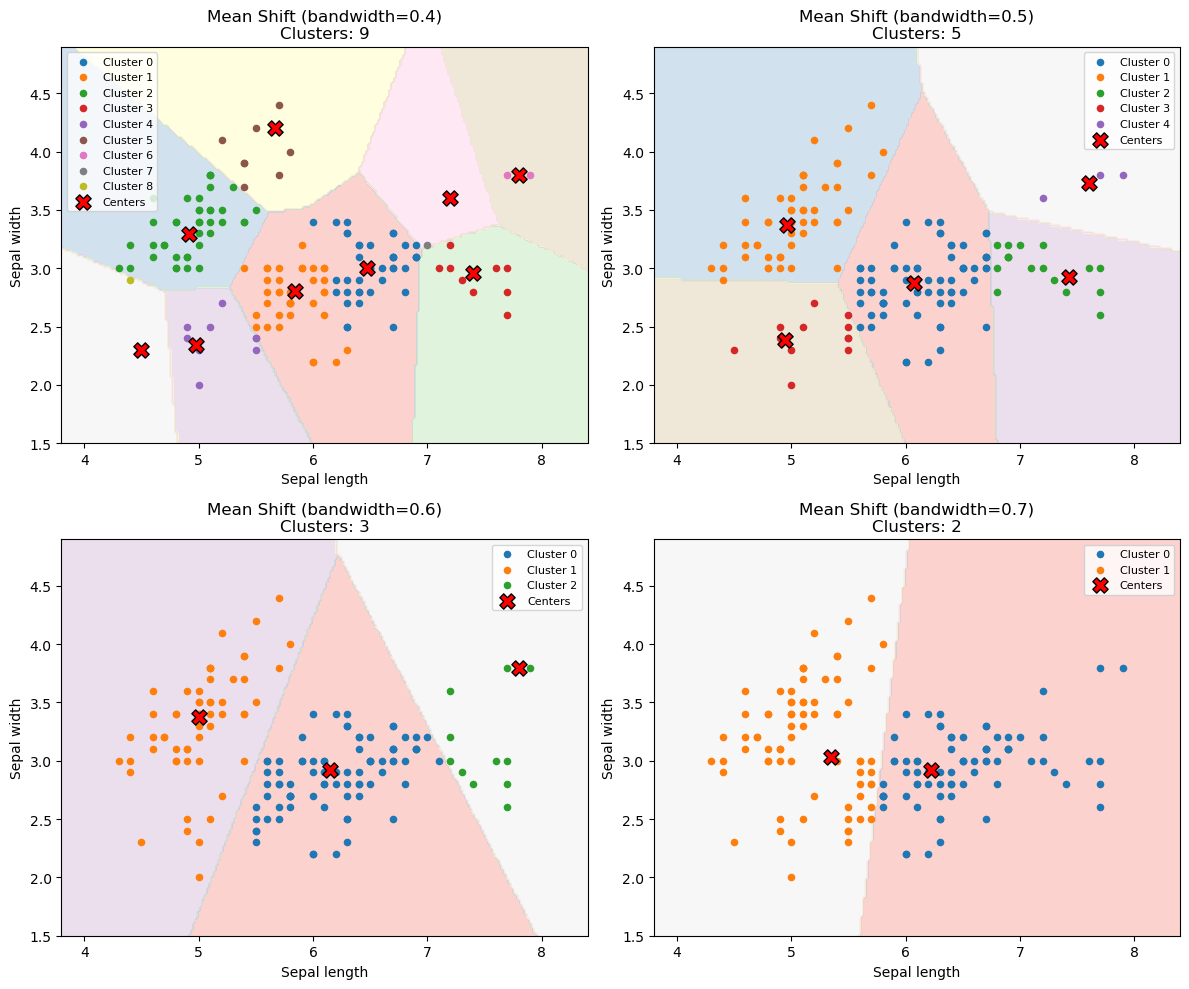

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Flatten axes array for easy iteration

h = 0.02  # Step size for mesh grid (resolution of decision boundary)

for i, bw in enumerate(bandwidths):
    # Perform Mean Shift Clustering
    # Mean Shift is a density-based clustering algorithm that shifts each point
    # toward the region of highest data density (mode of the distribution)
    ms = MeanShift(bandwidth=bw, bin_seeding=True)
    ms.fit(X)
    
    labels = ms.labels_  # Cluster labels for each point
    cluster_centers = ms.cluster_centers_  # Coordinates of cluster centers
    n_clusters = len(np.unique(labels))  # Number of detected clusters
    
    # Generate Grid for Decision Boundary Visualization
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict cluster label for each grid point
    Z = ms.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot Each Subfigure
    ax = axes[i]
    ax.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.6)  # Plot decision regions
    
    # Scatter plot of points in each cluster
    for k in range(n_clusters):
        ax.scatter(X[labels == k, 0], X[labels == k, 1],
                   s=20, label=f"Cluster {k}")
    
    # Mark cluster centers with red 'X'
    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
               marker='X', s=120, c='red', edgecolor='k', label='Centers')
    
    # Set titles and axis labels
    ax.set_title(f"Mean Shift (bandwidth={bw})\nClusters: {n_clusters}")
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.legend(loc='best', fontsize=8)

# Adjust subplot layout
plt.tight_layout()